In [1]:
pip install pandas matplotlib seaborn plotly dash


  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/27/ad/7047095224013ec2ae37ba8ece5956773e7953c39a3af5aa20d821ed99aa/dash-2.17.1-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/Heart Disease data.csv")

# Show the first few rows of the dataset
print(data.head())

# Display basic info and statistics
print(data.info())
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

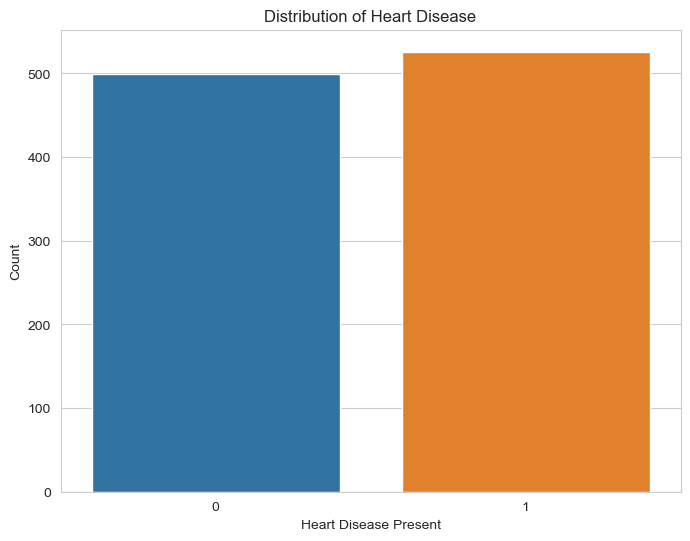

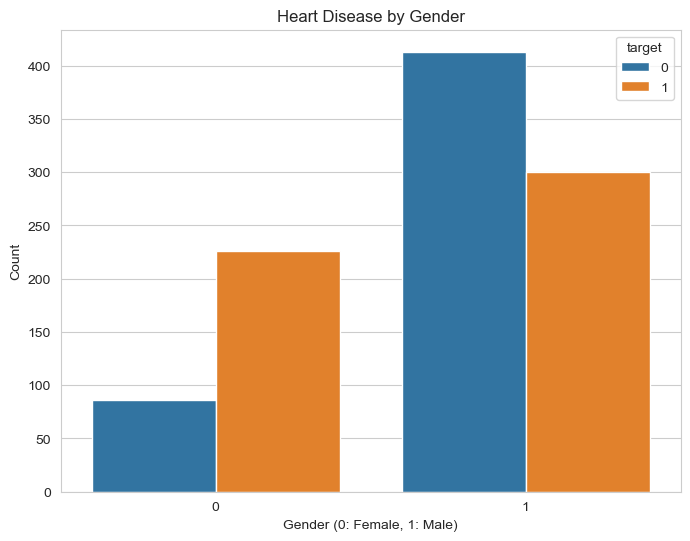

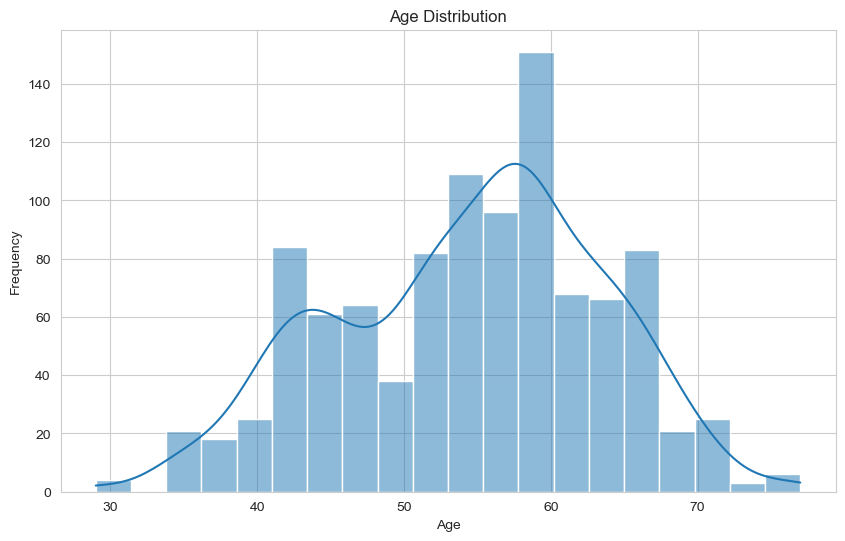

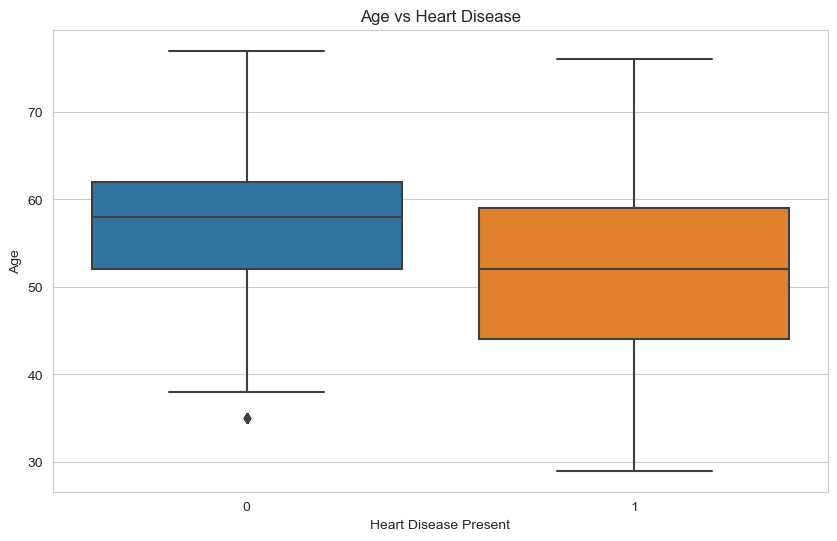

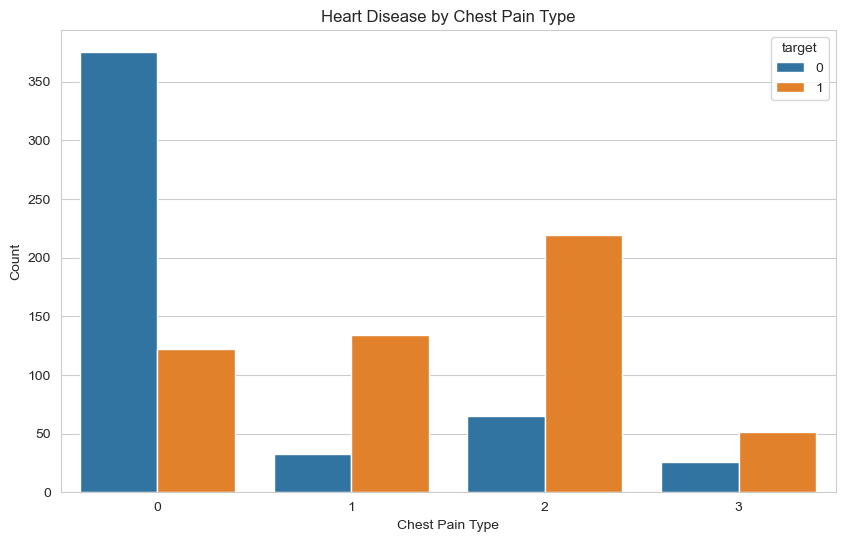

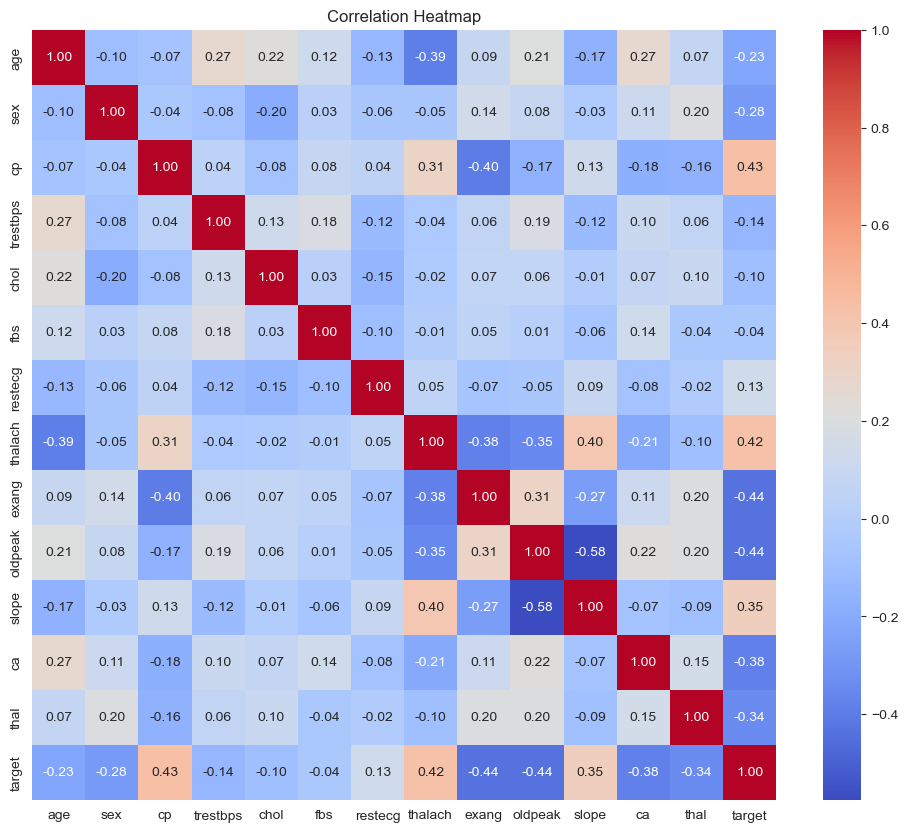

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style("whitegrid")

# Distribution of the target variable (Heart disease presence)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

# Heart disease by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Heart disease by age
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Age')
plt.show()

# Heart disease by chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
from dash import dcc, html, Dash
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the dashboard with interactive components
app.layout = html.Div([
    html.H1("Interactive Heart Disease Analysis Dashboard"),

    # Dropdown for filtering age range
    html.Div([
        dcc.Dropdown(
            id='age-range-dropdown',
            options=[
                {'label': 'All Ages', 'value': 'all'},
                {'label': '30-40', 'value': '30-40'},
                {'label': '40-50', 'value': '40-50'},
                {'label': '50-60', 'value': '50-60'},
                {'label': '60-70', 'value': '60-70'},
                {'label': '70+', 'value': '70+'}
            ],
            value='all',
            clearable=False
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Graphs
    dcc.Graph(id='age-distribution-graph'),
    dcc.Graph(id='heart-disease-by-gender'),
    dcc.Graph(id='age-vs-heart-disease'),
    dcc.Graph(id='chest-pain-type-distribution'),
    
    html.Hr(),
    html.P("This interactive dashboard provides an analysis of heart disease data including age distribution, "
           "distribution of heart disease, and the impact of chest pain type on heart disease presence.")
])

# Define callback for updating age distribution graph
@app.callback(
    Output('age-distribution-graph', 'figure'),
    [Input('age-range-dropdown', 'value')]
)
def update_age_distribution(selected_age_range):
    if selected_age_range == 'all':
        filtered_data = data
    else:
        age_ranges = {
            '30-40': (30, 40),
            '40-50': (40, 50),
            '50-60': (50, 60),
            '60-70': (60, 70),
            '70+': (70, 100)
        }
        min_age, max_age = age_ranges[selected_age_range]
        filtered_data = data[(data['age'] >= min_age) & (data['age'] <= max_age)]
    
    fig = px.histogram(filtered_data, x='age', nbins=20, title='Age Distribution')
    return fig

# Define callback for updating heart disease by gender graph
@app.callback(
    Output('heart-disease-by-gender', 'figure'),
    [Input('age-range-dropdown', 'value')]
)
def update_heart_disease_by_gender(selected_age_range):
    if selected_age_range == 'all':
        filtered_data = data
    else:
        age_ranges = {
            '30-40': (30, 40),
            '40-50': (40, 50),
            '50-60': (50, 60),
            '60-70': (60, 70),
            '70+': (70, 100)
        }
        min_age, max_age = age_ranges[selected_age_range]
        filtered_data = data[(data['age'] >= min_age) & (data['age'] <= max_age)]
    
    fig = px.bar(filtered_data, x='sex', color='target', barmode='group',
                 title='Heart Disease by Gender')
    return fig

# Define callback for updating age vs. heart disease graph
@app.callback(
    Output('age-vs-heart-disease', 'figure'),
    [Input('age-range-dropdown', 'value')]
)
def update_age_vs_heart_disease(selected_age_range):
    if selected_age_range == 'all':
        filtered_data = data
    else:
        age_ranges = {
            '30-40': (30, 40),
            '40-50': (40, 50),
            '50-60': (50, 60),
            '60-70': (60, 70),
            '70+': (70, 100)
        }
        min_age, max_age = age_ranges[selected_age_range]
        filtered_data = data[(data['age'] >= min_age) & (data['age'] <= max_age)]
    
    fig = px.box(filtered_data, x='target', y='age', title='Age vs. Heart Disease')
    return fig

# Define callback for updating chest pain type distribution graph
@app.callback(
    Output('chest-pain-type-distribution', 'figure'),
    [Input('age-range-dropdown', 'value')]
)
def update_chest_pain_type_distribution(selected_age_range):
    if selected_age_range == 'all':
        filtered_data = data
    else:
        age_ranges = {
            '30-40': (30, 40),
            '40-50': (40, 50),
            '50-60': (50, 60),
            '60-70': (60, 70),
            '70+': (70, 100)
        }
        min_age, max_age = age_ranges[selected_age_range]
        filtered_data = data[(data['age'] >= min_age) & (data['age'] <= max_age)]
    
    fig = px.bar(filtered_data, x='cp', color='target', barmode='group',
                 title='Chest Pain Type Distribution')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
